# 18.06 pset 8 Solutions


## Problem 1

In class, we showed that the pseudoinverse $A^+ = V \Sigma^{-1} U^T$ gives the minimum-norm least-squares solution $\hat{x} = A^+ b$.

Suppose that $A$ is an $m\times n$ matrix with full column rank.  In this case, $V$ is a .......... matrix.

By plugging in the SVD $A = U \Sigma V^T$ (and keeping in mind the *shapes* of the matrices), show explicitly in this case that
$$
A^+ = (A^T A)^{-1} A^T
$$
Check your answer with Julia on a random 5×3 matrix:

### Solution

If $A$ is an $m\times n$ matrix with full column rank, then the rank of $A$ is $n$. This means that $V$ will be an $n\times n$ orthogonal matrix, with $V^TV=VV^T = I$. In particular, $V^{-1}=V^T$. We can then substitute the SVD into $(A^TA)^{-1}A^T$ to show that:
\begin{align}
(A^TA)^{-1}A^T &= ((U\Sigma V^T)^T(U\Sigma V^T))^{-1}(U\Sigma V^T)^T\\
&=(V\Sigma U^TU\Sigma V^T)^{-1}V\Sigma U^T\\
&=(V\Sigma^2 V^T)^{-1}V\Sigma U^T\\
&= (V^T)^{-1}(\Sigma^2)^{-1} V^{-1}V\Sigma U^T\\
&= V(\Sigma^{-1})^2 \Sigma U^T\\
&= V\Sigma^{-1}U^T\\
&= A^+.
\end{align}
We can then check this on Julia for a random $5\times 3$ matrix:

In [2]:
A = rand(5,3); # 5×3 matrix with rank 3
A⁺ = pinv(A) # the pseudoinverse A⁺ calculated via the SVD

3×5 Array{Float64,2}:
  3.25035     -2.36076   -2.75511    0.431479  -0.764926
 -1.17676      0.278653   1.9308     0.574173  -0.377877
  0.00569275   0.750639  -0.126187  -0.149574   0.674257

In [3]:
# calculate (AᵀA)⁻¹Aᵀ and check that it matches A⁺ (up to roundoff error)
C = inv(A'A)*A'

3×5 Array{Float64,2}:
  3.25035     -2.36076   -2.75511    0.431479  -0.764926
 -1.17676      0.278653   1.9308     0.574173  -0.377877
  0.00569275   0.750639  -0.126187  -0.149574   0.674257

In [4]:
A⁺ - C

3×5 Array{Float64,2}:
 -5.32907e-15  -1.33227e-15   6.21725e-15   2.44249e-15  -2.66454e-15
  3.77476e-15  -2.77556e-16  -4.44089e-15  -1.11022e-15   1.16573e-15
 -9.45424e-17   6.66134e-16   4.996e-16    -8.32667e-17   4.44089e-16

We see that the error between the pseudoinverse $A^+$ calculate via SVD and $(A^TA)^{-1}A^T$ calculated explicitly is on the order of the machine precision.

## Problem 2

Recall the polynomial fitting exercise from the [least-square fitting notebook](http://nbviewer.jupyter.org/github/stevengj/1806/blob/master/lectures/Least-Square%20Fitting.ipynb) in lecture 12.  We saw that one of the things that can go terribly wrong is *overfitting*.  Here, we will use the SVD to help us understand this phenomenon.

In class, we fitted a polynomial of degree $n$ to 50 data points generated from a degree-3 polynomial $1 + 2a + 3a^2 + 4a^3$ plus noise, using the $m \times n$ [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix)
$$
A = \begin{pmatrix}
        1 & a_1 & a_1^2 & \cdots a_1^{n-1} \\
        1 & a_2 & a_2^2 & \cdots a_2^{n-1} \\
        1 & a_3 & a_3^2 & \cdots a_3^{n-1} \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & a_m & a_m^2 & \cdots a_m^{n-1} \\
    \end{pmatrix}
$$
and we found that the fit "went crazy" for $n=40$.

**(a)** Look at the singular values $\sigma_k$ of $A$ using `svdvals(A)`.  

What is the condition number of the matrix?

The matrix $A$ is very ill-conditioned, which means that the columns are *nearly* linearly dependent.  As you add more and more columns to $A$ (that is, as you increase $n$), why are they becoming nearly linearly dependent?  **What vector are the rightmost columns becoming nearly parallel to?**

**(b)** Another symptom of the fact that the matrix $A$ is ill-conditioned is that our solution $\hat{x}$ from above had huge components (because $\hat{x} = A^+ b$ divides by $\sigma$ values that are nearly zero).

In consequence, a common technique to cope with overfitting is **ridge regression**, also called a [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) and many other names.   Instead of minimizing $\Vert b - Ax \Vert$, we minimize:
$$
\Vert b - Ay \Vert^2 + \lambda \Vert y \Vert^2
$$
where $\lambda > 0$ is some constant parameter (whose magnitude depends on the amount of noise etcetera), corresponding to a **penalty term** $\lambda \Vert y \Vert^2$ that tries to make $\Vert y \Vert$ small.

Using the solution to [problem 8 of pset 6](http://nbviewer.jupyter.org/github/stevengj/1806/blob/master/psets/pset6sol.ipynb), give an equation for the minimum $\hat{y}$ of the ridge-regularized fitting problem.  It should look very similar to the $A^T A \hat{x} = A^T b$ "normal equations" for ordinary fitting, and should be identical for $\lambda = 0$.

**(c)** Implement Julia code to find $\hat{y}$ by solving your equations from (b), and use the following code plot the fit curve for $\lambda = 1$.  Compare $\Vert \hat{y} \Vert$ to $\Vert \hat{x} \Vert$ to see that the fit coefficients are now much smaller.

**(d)** For a full column-rank $m\times n$ matrix with SVD $A = U \Sigma V^T$, write the ridge-regularized solution in a form resembling the pseudoinverse:

$$
\hat{y} = V \, (???) \, U^T b
$$

where $(???)$ is some $n\times n$ matrix in terms of the singular values $\sigma_k$ and the regularization parameter $\lambda$.

Your result should be *equivalent* to the pseudoinverse $A^+$ but with each singular value $\sigma_k$ replaced by ..........., which effectively makes the singular values ...*larger or smaller*... and the condition number ...*larger or smaller*...?

(Your analysis from problem 1 should help, here: plug the SVD into your modified normal equations for $\hat{y}$.)

The fit coefficients x̂ = 

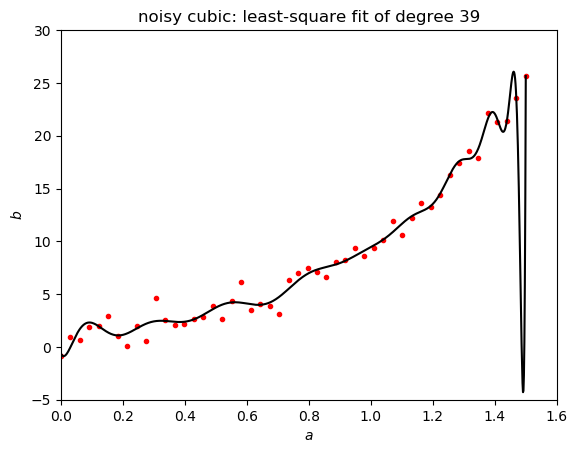

[-0.596186, -64.6964, 4336.71, -66402.3, 4.6506e5, -1.71595e6, 3.29385e6, -2.42666e6, -1.35818e6, 1.99925e6, 1.63502e6, -8.75557e5, -1.98142e6, -8.18209e5, 1.01513e6, 1.73542e6, 9.02732e5, -5.99215e5, -1.52559e6, -1.23328e6, -34749.1, 1.13756e6, 1.42938e6, 651369.0, -603794.0, -1.38031e6, -1.05532e6, 1.48893e5, 1.24415e6, 1.21569e6, -25556.9, -1.30533e6, -1.11043e6, 5.96789e5, 1.57446e6, -1.9291e5, -1.87304e6, 1.59546e6, -5.27162e5, 64590.4]


In [5]:
# 50 random points: cubic curve + noise
a = linspace(0,1.5,50)
cubic_curve = 1 + 2a + 3a.^2 + 4a.^3
noise = [-1.85162, -0.0926124, -0.465889, 0.706349, 0.687657, 1.56087, -0.471584, -1.52037, 0.25009, -1.34435, 2.60913, 0.41325, -0.216823, -0.376511, -0.039416, -0.121802, 0.746839, -0.742129, 0.675443, 2.1361, -0.77771, -0.478586, -1.04285, -2.12879, 0.634166, 0.888346, 0.93576, 0.0984751, -0.778859, 0.0655202, -0.274275, 0.335213, -0.98845, -0.825566, -0.694586, 0.463086, -1.60764, -0.698796, -0.0979684, -1.24252, -0.908324, 0.157426, 0.366131, 0.624238, -1.04046, 2.28898, 0.384362, -0.574102, 0.503379, 1.40204] # from randn(length(a))
b = cubic_curve + noise

# naïve least-square fit
n = 40
A = a .^ (0:n-1)'
x̂ = A \ b

# plot the fit
using PyPlot
afine = linspace(0,1.5,1000)
plot(a, b, "r.")
plot(afine, (afine .^ (0:n-1)') * x̂, "k-")
xlabel(L"a")
ylabel(L"b")
xlim(0,1.6)
ylim(-5,30)
title("noisy cubic: least-square fit of degree $(n-1)")

println("The fit coefficients x̂ = ", x̂)

### Solution

**(a)** We can use Julia to look at the singular values $\sigma_k$ of $A$:  

In [6]:
show(STDOUT, "text/plain", svdvals(A)) # print the whole list

40-element Array{Float64,1}:
    1.10952e7  
    1.65087e5  
 5691.46       
  354.901      
   38.8479     
    9.48916    
    5.21667    
    2.30107    
    0.931682   
    0.350195   
    0.123805   
    0.0414151  
    0.0131555  
    0.0039772  
    0.00114604 
    0.000315016
    8.26263e-5 
    2.06787e-5 
    4.93567e-6 
    1.12263e-6 
    2.43052e-7 
    5.00094e-8 
    9.76131e-9 
    1.80239e-9 
    3.14291e-10
    5.21956e-11
    1.20176e-11
    6.93022e-12
    3.28464e-12
    1.5493e-12 
    9.71632e-13
    7.2367e-13 
    4.42705e-13
    1.50879e-13
    8.70161e-14
    5.18384e-14
    3.87459e-14
    1.64599e-14
    7.92324e-15
    3.45967e-15

We notice that most of the singular values of $A$ are very small, with some very close to machine precision. The condition number of a matrix is the ratio of the largest and smallest singular value. We can calculate the condition number based on Julia's calculations for the singular values:

In [7]:
c = maximum(svdvals(A))/minimum(svdvals(A))

3.206994384296511e21

or equivalently by the built-in `cond` function:

In [8]:
cond(A)

3.206994384296511e21

and we see that the condition number is *very* large.  This means that the fit parameters $\hat{x}$ are going to be extremely sensitive to noise in the data, and will probably be garbage.

As you add more and more columns to $A$ (that is, as you increase $n$), the columns on the far right of $A$ are all nearly parallel to each other. This is because the entries of each column will become dominated by their largest entry, $a_m^{n-1}$. This will become much larger than any other entry in each column, since $\left(\frac{a_i}{a_m}\right)^n\to 0$ as $n\to\infty$, for any $i<m$. This means that the columns are all becoming parallel to the vector $(0,0,...0,1)$ as $n\to\infty$.  

So for large $n$, the matrix $A$ is very well approximated by a matrix of much smaller rank, and so this is why many of the singular values are very small.

**(b)**  Instead of minimizing $\Vert b - Ax \Vert$, we now wish to minimize:
\begin{align}
\Vert b - Ay \Vert^2 + \lambda \Vert y \Vert^2
\end{align}
where $\lambda > 0$. Comparing this to problem 8 on pset 6, we see this is equivalent to instead minimizing:
\begin{align}
\left\Vert \begin{pmatrix} b \\ 0 \end{pmatrix} - \begin{pmatrix} A \\ \sqrt{\lambda} I \end{pmatrix} y \right\Vert^2,
\end{align}
where $0$ is a zero vector of length $n$ and $I$ is the $n\times n$ identity matrix. The normal equations for this minimization problem are
\begin{align}
\boxed{(A^TA+\lambda I)y = A^T b 
\iff A^TAy + \lambda y = A^T b},
\end{align}
which reduce to the standard normal equations in the limit $\lambda \to 0$. 

**(c)** We can then implement the Julia code to find $\hat{y}$ by solving the equations from (b) and plot the fit curve for $\lambda = 1$. We can also compare $\Vert \hat{y} \Vert$ to $\Vert \hat{x} \Vert$ to see that the fit coefficients are now much smaller.

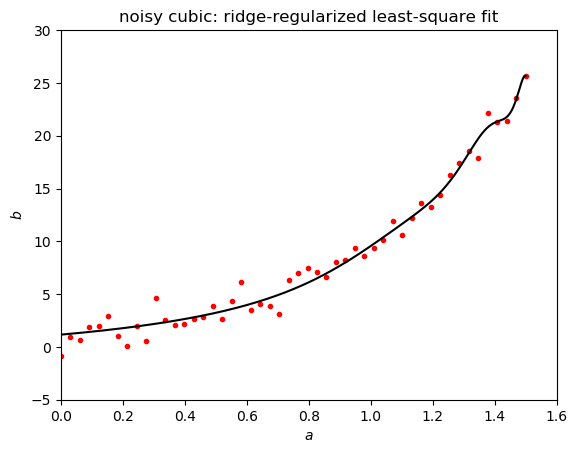

The fit coefficients ŷ = [1.16203, 2.60617, 1.94149, 1.43126, 1.0454, 0.750029, 0.520359, 0.340103, 0.198747, 0.0893038, 0.00688521, -0.0521565, -0.0907635, -0.111522, -0.116907, -0.109458, -0.0918977, -0.0672008, -0.0385918, -0.00946833, 0.0167637, 0.0369542, 0.0485669, 0.0500903, 0.0414867, 0.0244824, 0.0027515, -0.0184443, -0.0330503, -0.0357442, -0.0241401, -0.000850735, 0.0250537, 0.0390255, 0.0276407, -0.0097438, -0.0483299, -0.0309057, 0.0639699, -0.0197028]


In [9]:
λ = 1;
C = A'A + λ*I;
d = A'b;
ŷ = C \ d

# plot the fit
plot(a, b, "r.")
plot(afine, (afine .^ (0:n-1)') * ŷ, "k-")
xlabel(L"a")
ylabel(L"b")
xlim(0,1.6)
ylim(-5,30)
title("noisy cubic: ridge-regularized least-square fit")

println("The fit coefficients ŷ = ", ŷ)

Notice that the ridge regularization removed the wild oscillations from the fit, which is a good sign.

The fit parameters (the polynomial coefficients) are also much smaller than before:

In [10]:
norm(ŷ) / norm(x̂) # we should have ‖ŷ‖ ≪ ‖x̂‖

4.975393619903798e-7

**(d)** The solution, $\hat{y}$, to the ridge regularized minimization problem obeys the adapted normal equations:
\begin{align}
\left(A^TA + \lambda I\right)y = A^Tb.
\end{align}
Since $A$ has full column rank, we can write $A=U\Sigma V^T$, where $V$ is an $n\times n$ orthogonal matrix (so that $V^{-1}=V^T$). We can write $A^TA$ using the SVD representation:
$$
A^TA = (V\Sigma U^T)(U\Sigma V^T) = V\Sigma^2 V^T .
$$
We can also write $I = VIV^T$, so that the equations for $\hat{y}$ become:
\begin{align}
(V\Sigma^2V^T + \lambda VIV^T)y &= V\Sigma U^T b\\
\implies V(\Sigma^2+\lambda I)V^T y &= V\Sigma U^T b\\
\implies (\Sigma^2+\lambda I)V^T y &= \Sigma U^T b.
\end{align}
where the last line follows from the fact that $V$ is invertible. We now notice that $\Sigma^2+\lambda I$ is a diagonal matrix with entries $\sigma_k^2 + \lambda$ on the diagonal:
\begin{align}
\Sigma^2+\lambda I = \begin{pmatrix} \sigma_1^2 + \lambda & & & \\ & \sigma_2^2+ \lambda & & \\ & & \ddots & \\ & & & \sigma_n^2 + \lambda\end{pmatrix} \implies (\Sigma^2+\lambda I)^{-1} = \begin{pmatrix} \frac{1}{\sigma_1^2 + \lambda} & & & \\ & \frac{1}{\sigma_2^2+ \lambda} & & \\ & & \ddots & \\ & & & \frac{1}{\sigma_n^2 + \lambda}\end{pmatrix}.
\end{align}
We then have that
\begin{align}
\boxed{\hat{y} = V \Gamma U^T b},
\end{align}
where
\begin{align}
\Gamma = (\Sigma^2+\lambda I)^{-1} \Sigma = \begin{pmatrix} \frac{\sigma_1}{\sigma_1^2 + \lambda} & & & \\ & \frac{\sigma_2}{\sigma_2^2+ \lambda} & & \\ & & \ddots & \\ & & & \frac{\sigma_n}{\sigma_n^2 + \lambda}\end{pmatrix}.
\end{align}

If we compare this to the usual pseudoinverse $A^+ = V \Sigma^{-1} U^T$ , we see that $\Gamma$ has the same structure as $\Sigma^{-1}$, but with the inverse of the singular values $\sigma_k^{-1}$ replace by $\frac{\sigma_k}{\sigma_k^2 + \lambda}$. This means that we have effectively made all of the singular values larger, since $\frac{\sigma_k^2 + \lambda}{\sigma_k}=\sigma_k + \frac{\lambda}{\sigma_k} > \sigma_k$. This will mean that there are no longer any singular values that are close to $0$ and so will effectively make the condition number smaller. 